# Proyecto diabetes: predicción de diabetes


[![closeup-shot-doctor-with-rubber-gloves-taking-blood-test-from-patient-1.jpg](https://i.postimg.cc/PqgbWrRM/closeup-shot-doctor-with-rubber-gloves-taking-blood-test-from-patient-1.jpg)](https://postimg.cc/TycWGGGy)
## Contenido

1. [Planteamiento del problema](#sec_1) ✔️
2. [Exploración del set de datos](#sec_2) ✔️
3. [Limpieza del set de datos](#sec_3) ✔️
4. [Análisis de los datos](#sec_4) ✔️
5. [Preprocesamiento](#sec_5) ✔️
6. [Predicción](#sec_6) ✔️
7. [Reporte final](#sec_7) ✔️

<a id='sec_1'></a>
## 1. Planteamiento del problema


**Diabetes Detectives**: ¡Bienvenido a este proyecto de Machine Learning enfocado en la detección de la diabetes! A través del análisis de datos médicos y el poder de los algoritmos de aprendizaje automático, exploraremos la probabilidad de que una persona tenga esta condición.Este proyecto ofrece una visión detallada de la salud de los individuos. Únete a nosotros en esta misión analítica y descubre cómo la ciencia de los datos puede ayudarnos a anticipar y prevenir la diabetes, iluminando el camino hacia una vida más saludable y consciente. 🩺🔍


### 1.2. Recursos disponibles
- [Set de datos](diabetes.csv)

<a id='sec_2'></a>
## 2. Exploración del set de datos

El objetivo de esta fase es poder familiarizarnos con la información contenida en el set de datos.

1. Leer el set de datos
2. Entender tamaño, columnas y filas del set de datos
3. Entender qué tipos de datos tenemos en cada columna
4. Entender el rango de valores de las variables numéricas
6. Verificar si hay datos faltantes

Llevemos a cabo cada una de estas fases:

### 2.1. Leer el set de datos
y
### 2.2. Entender su tamaño y el contenido de sus filas y columnas

In [1]:
import pandas as pd
df = pd.read_csv(r"F:\Examen Liner Cullanco\diabetes.csv")
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


> **Observación**
> Al leer el data set , se pudo observar que cuenta con 768 filas y 9 columnas, las cuales son provenientes de archivo diabetes.

### 2.3. Entender qué tipos de datos tenemos en cada columna

In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


>**Observación**
>Al poder observar a mas detalle el tipo de dato que tiene cada columna, se pudo ver que casi todas las columnas contienen datos numericos(`float, int`).

### 2.4 Entender el rango de valores de las variables numéricas

In [3]:
df.select_dtypes(include='number')

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


>**Observación**
>Como se puede observar , en ambas columnas que son de tipo numericas y contienen una información significativa en cuanto al analisis que estamos realizando.

### 2.6 Verificar si hay datos faltantes

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


>**Observación**
>Al observar las columnas , se pudo evidenciar que no hay columnas con valores faltantes.

>**Sugerencia**
>Se sugiere no se eliminen columnas, puesto que nos podria causar problemas al momento de interpretar el analisis y predecir si un paciente tiene o no diabetes.

<a id='sec_3'></a>
## 3. Limpieza del set de datos

Etapas de limpieza:

1. Vizualiar distribución de los datos
2. Revisión de valores outliers

Implementemos cada fase teniendo en cuenta las observaciones que hemos hecho hasta el momento.

### 3.1. Vizualiar distribución de los datos

array([[<Axes: title={'center': 'Pregnancies'}>,
        <Axes: title={'center': 'Glucose'}>,
        <Axes: title={'center': 'BloodPressure'}>],
       [<Axes: title={'center': 'SkinThickness'}>,
        <Axes: title={'center': 'Insulin'}>,
        <Axes: title={'center': 'BMI'}>],
       [<Axes: title={'center': 'DiabetesPedigreeFunction'}>,
        <Axes: title={'center': 'Age'}>,
        <Axes: title={'center': 'Outcome'}>]], dtype=object)

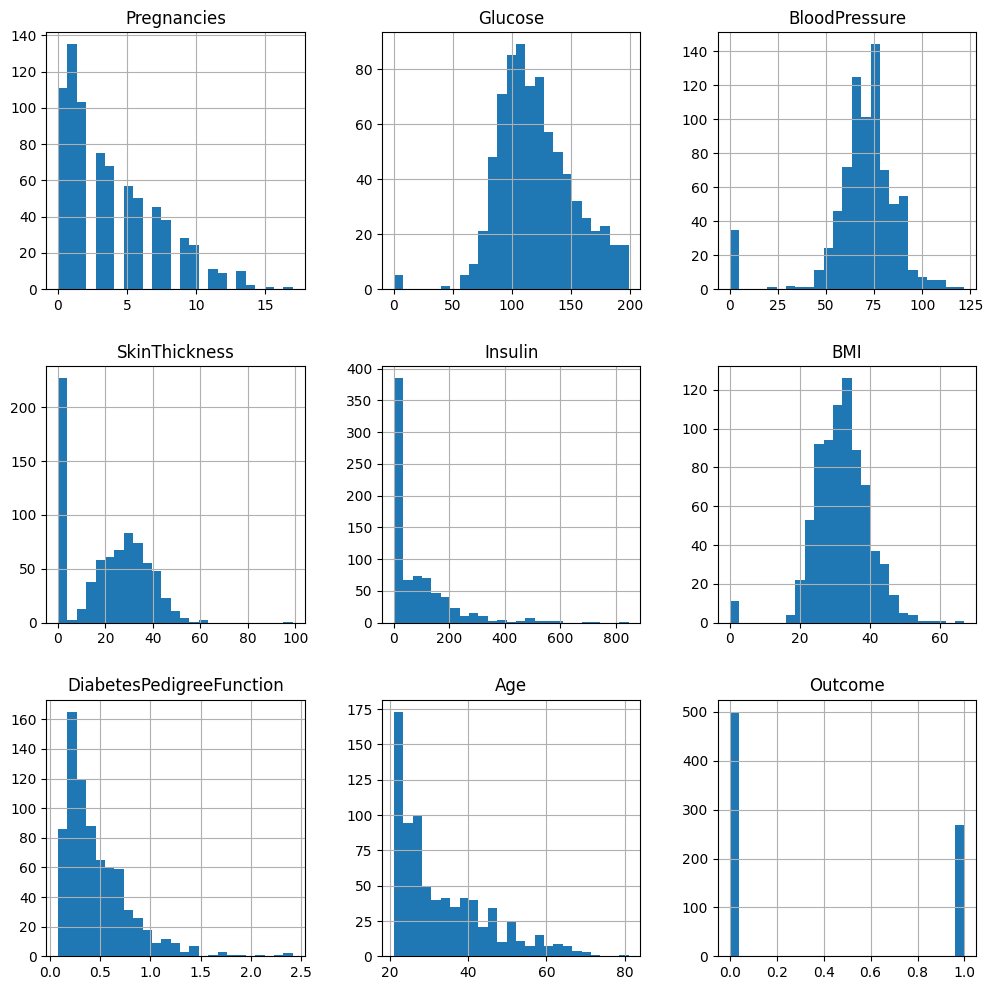

In [5]:
df.hist(bins=25, figsize=(12, 12), xlabelsize='10', ylabelsize='10')

### 3.2. Revisión de valores outliers

3.2.1 Remplazo de los valores 0 por valroes NaN

In [6]:
import numpy as np

In [7]:
df[['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age']] = df[['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age']].replace(0, np.NaN)

>**Observación**
> Debido a que nos encontramos con muchos valores 0 en diferentes columnas y para no borrarlo , lo que se hizo es remplazar los 0 con NaN
> para posteriormente poder tomar una desición de completar con valores deacuerdo a cada columna y mejorar nuestra predicción

In [8]:
df.isnull().sum()

Pregnancies                   0
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64

In [9]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72.0,35.0,NaN,33.6,0.627,50,1
1,1,85.0,66.0,29.0,NaN,26.6,0.351,31,0
2,8,183.0,64.0,NaN,NaN,23.3,0.672,32,1
3,1,89.0,66.0,23.0,94.0,28.1,0.167,21,0
4,0,137.0,40.0,35.0,168.0,43.1,2.288,33,1


3.2.2 Sacar mediana agrupado por nuestro target de las columnas que no tienen NaN

In [10]:
def mediana_target(columna):   
    temporal = df[df[columna].notnull()]
    temporal = temporal[[columna, 'Outcome']].groupby(['Outcome'])[[columna]].median().reset_index()
    return temporal

In [11]:
colunme = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age']

In [12]:
for col in colunme:
    resultado = mediana_target(col)
    print("Mediana para la columna", col)
    print(resultado)
    print("----------------------")

Mediana para la columna Glucose
   Outcome  Glucose
0        0    107.0
1        1    140.0
----------------------
Mediana para la columna BloodPressure
   Outcome  BloodPressure
0        0           70.0
1        1           74.5
----------------------
Mediana para la columna SkinThickness
   Outcome  SkinThickness
0        0           27.0
1        1           32.0
----------------------
Mediana para la columna Insulin
   Outcome  Insulin
0        0    102.5
1        1    169.5
----------------------
Mediana para la columna BMI
   Outcome   BMI
0        0  30.1
1        1  34.3
----------------------
Mediana para la columna DiabetesPedigreeFunction
   Outcome  DiabetesPedigreeFunction
0        0                     0.336
1        1                     0.449
----------------------
Mediana para la columna Age
   Outcome   Age
0        0  27.0
1        1  36.0
----------------------


In [13]:
for i in colunme:
    mediana_target(i)
    df.loc[(df['Outcome'] == 0 ) & (df[i].isnull()), i] = mediana_target(i)[i][0]
    df.loc[(df['Outcome'] == 1 ) & (df[i].isnull()), i] = mediana_target(i)[i][1]

In [14]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72.0,35.0,169.5,33.6,0.627,50,1
1,1,85.0,66.0,29.0,102.5,26.6,0.351,31,0
2,8,183.0,64.0,32.0,169.5,23.3,0.672,32,1
3,1,89.0,66.0,23.0,94.0,28.1,0.167,21,0
4,0,137.0,40.0,35.0,168.0,43.1,2.288,33,1


>**Observación**
> Como se puede observar se completo los valores inicialmente los 0 por NaN para no eliminar por que en algunas columnas se tenian
> valores 0  y luego los NaN se remplazo por la mediana de cada columna agrupado por nuestra columna Outcome

In [15]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

>**Observación**
> No se cuenta con valores NaN

3.2.2 Visualización de valores de la columna Pregnancies

In [16]:
import seaborn as sns
import matplotlib.pyplot as plt

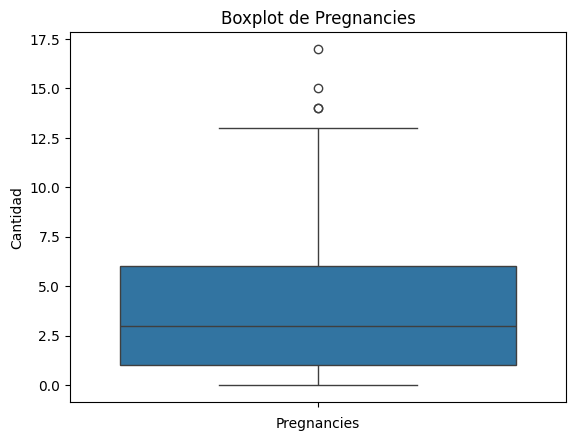

In [17]:
sns.boxplot(y ='Pregnancies', data=df)
plt.title('Boxplot de Pregnancies')
plt.xlabel('Pregnancies')
plt.ylabel('Cantidad')
plt.show()


> **Observación**
> Como se pudo observar en la columna Pregnancies, se cuenta con valores outliers que son mayores a 13

>**Sugerencia**
> En la vida real  en las zonas mas alejadas del país hay personas que se han estado embarazadas y han tenido muchos hijos y para que nuestro modelo 
> pueda en un punto tambien poder predecir en base a esta caracteristica Pregnancies y quizas sea Pregnancies hasta 17 , pueda predecir de manera correcta

>**LINK de referencia de una persona embaraza 20 veces y tiene 20 hijos**
https://www.infobae.com/colombia/2024/01/21/hasta-que-el-cuerpo-me-de-mujer-con-20-hijos-recomienda-dar-a-luz-para-recibir-subsidios-del-estado/

3.2.3 Visualización de valores de la coulumna Glucose

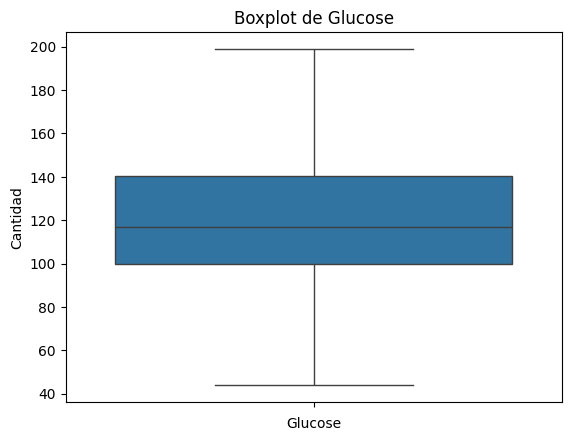

In [18]:
sns.boxplot(y ='Glucose', data=df)
plt.title('Boxplot de Glucose')
plt.xlabel('Glucose')
plt.ylabel('Cantidad')

# Mostrar el gráfico
plt.show()

>**Observación**
> Como se puede observar no se cuenta con valores outliers

3.2.4 Visualización de valores de la coulumna BloodPressure

Text(0, 0.5, 'Valor')

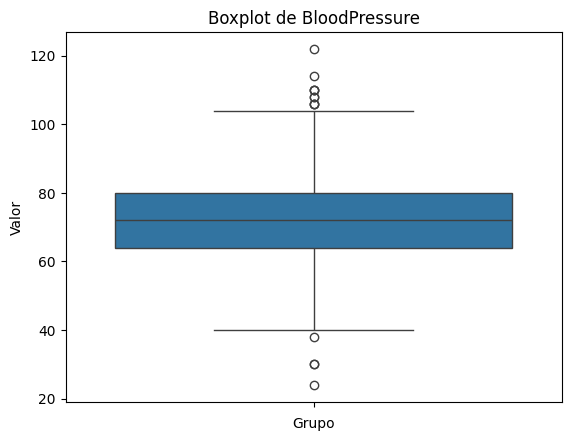

In [19]:
sns.boxplot(y ='BloodPressure', data=df)
plt.title('Boxplot de BloodPressure')
plt.xlabel('Grupo')
plt.ylabel('Valor')

> **Observación**
> Como se pudo observar en la columna BloodPressure, se cuenta con valores outliers

>**Sugerencia**
> Como se puede observar hay valores outliers pero en la vida real una persona puede tener BloodPressure incluso 120 o menor a 40
> es por ello que se sugiere no eliminarlo

>**Link de la referencia**
https://www.google.com/url?sa=i&url=https%3A%2F%2Fwww.goredforwomen.org%2Fes%2Fhealth-topics%2Fhigh-blood-pressure%2Funderstanding-blood-pressure-readings&psig=AOvVaw1YtIdYdTXVLEH-A82biyyj&ust=1713818491864000&source=images&cd=vfe&opi=89978449&ved=0CBIQjRxqFwoTCNDat8SV1IUDFQAAAAAdAAAAABA_

3.2.5 Visualización de valores de la coulumna SkinThickness

Text(0, 0.5, 'Cantidad')

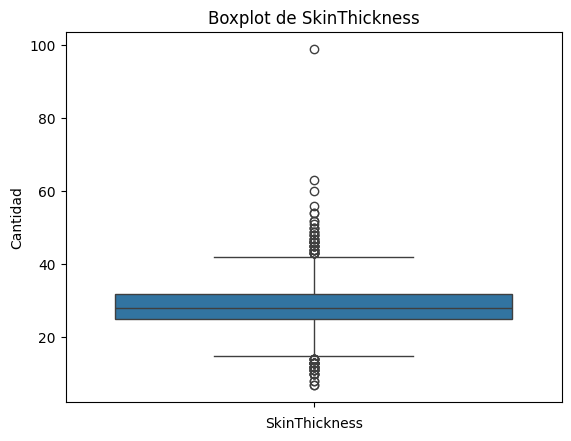

In [20]:
sns.boxplot(y ='SkinThickness', data=df)
plt.title('Boxplot de SkinThickness')
plt.xlabel('SkinThickness')
plt.ylabel('Cantidad')

> **Observación**
> Como se pudo observar en la columna SkinThickness, se cuenta con 1 valor outlier que es 99

In [21]:
df.loc[df['SkinThickness'] == 99.0]

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
579,2,197.0,70.0,99.0,169.5,34.7,0.575,62,1


**Borrando outliers de SkinThickness**

In [22]:
df = df.drop(index=[579])

Text(0, 0.5, 'Cantidad')

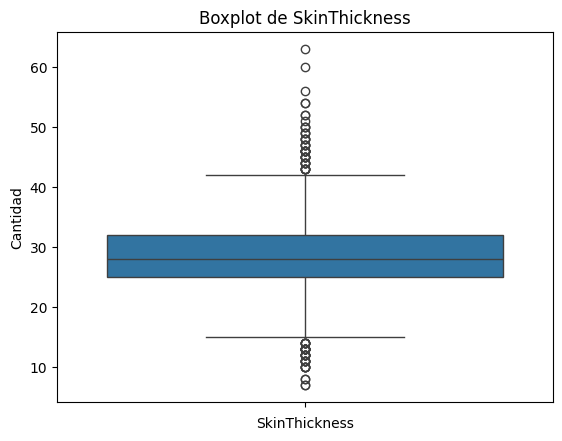

In [23]:
sns.boxplot(y ='SkinThickness', data=df)
plt.title('Boxplot de SkinThickness')
plt.xlabel('SkinThickness')
plt.ylabel('Cantidad')

>**Observación**
> Como se pudo observar en este segundo gráfico ya no tenemos el valor 99 como outliers debido a que no es normal 
> que una persona tenga ese valor y es muy alto

3.2.6 Visualización de valores de la coulumna Insulin

Text(0, 0.5, 'Cantidad')

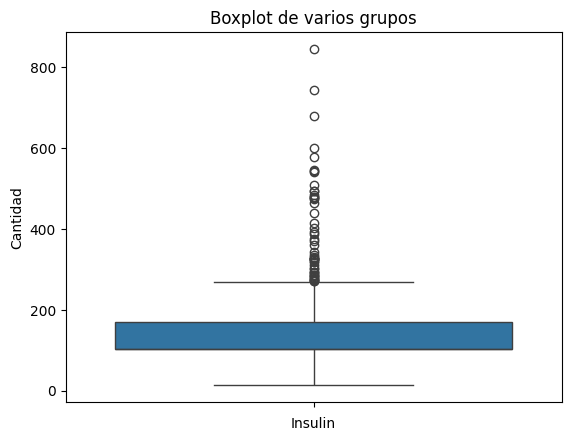

In [24]:
sns.boxplot(y ='Insulin', data=df)
plt.title('Boxplot de varios grupos')
plt.xlabel('Insulin')
plt.ylabel('Cantidad')

> **Observación**
> Como se pudo observar en la columna Insulin, se cuenta con valores outliers que son mayores a 350

>**Sugerencia**
> Como se pudo observar se cuenta con valores ouliers y se recomienda poder eliminarlo para que no afecte a nuestra predicción
> ademas a ello cuando una persona tiene diabetes los valores maximos de insulina que podria tener no es mayor a 250

In [25]:
df.loc[df['Insulin']>250].index

Index([  8,  13,  53,  54,  56,  73, 111, 139, 144, 153, 162, 186, 199, 206,
       215, 220, 228, 231, 247, 248, 254, 258, 279, 286, 296, 335, 360, 364,
       370, 375, 388, 392, 395, 409, 412, 415, 425, 480, 486, 487, 519, 561,
       574, 584, 606, 608, 612, 645, 655, 679, 695, 707, 710, 713, 715, 753],
      dtype='int64')

In [26]:
df = df.drop(index=[8,  13,  53,  54,  56,  73, 111, 139, 144, 153, 162, 186, 199, 206,
       215, 220, 228, 231, 247, 248, 254, 258, 279, 286, 296, 335, 360, 364,
       370, 375, 388, 392, 395, 409, 412, 415, 425, 480, 486, 487, 519, 561,
       574, 584, 606, 608, 612, 645, 655, 679, 695, 707, 710, 713, 715, 753])

Text(0, 0.5, 'Cantidad')

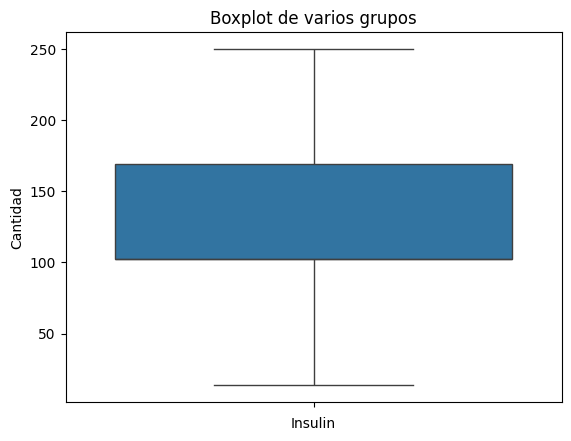

In [27]:
sns.boxplot(y ='Insulin', data=df)
plt.title('Boxplot de varios grupos')
plt.xlabel('Insulin')
plt.ylabel('Cantidad')

>**Observación**
> Como se pudo observar en este segundo gráfico ya no tenemos valores outliers

>**link de referencia**
https://www.intramed.net/contenidover.asp?contenidoid=92297

3.2.7 Visualización de valores de la coulumna BMI

Text(0, 0.5, 'Cantidad')

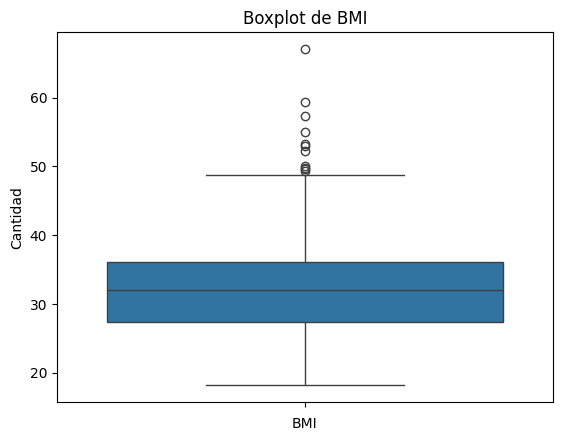

In [28]:
sns.boxplot(y ='BMI', data=df)
plt.title('Boxplot de BMI')
plt.xlabel('BMI')
plt.ylabel('Cantidad')

In [29]:
df.loc[df['BMI']>50].index

Index([120, 125, 177, 193, 303, 445, 673], dtype='int64')

In [30]:
df = df.drop(index=[120, 125, 177, 193, 303, 445, 673])

Text(0, 0.5, 'Cantidad')

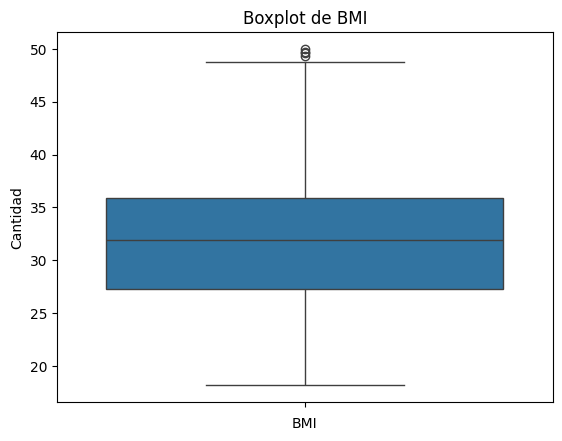

In [31]:
sns.boxplot(y ='BMI', data=df)
plt.title('Boxplot de BMI')
plt.xlabel('BMI')
plt.ylabel('Cantidad')

> **Observación**
> Como se pudo observar en la columna BMI, se cuenta con valores outliers que son mayores a 50 pero son pocos casos que se puede consiras en lagunas personas
> mas aún que luego de la pandemia las personas han subido su BMI

3.2.8 Visualización de valores de la coulumna DiabetesPedigreeFunction

Text(0, 0.5, 'Cantidad')

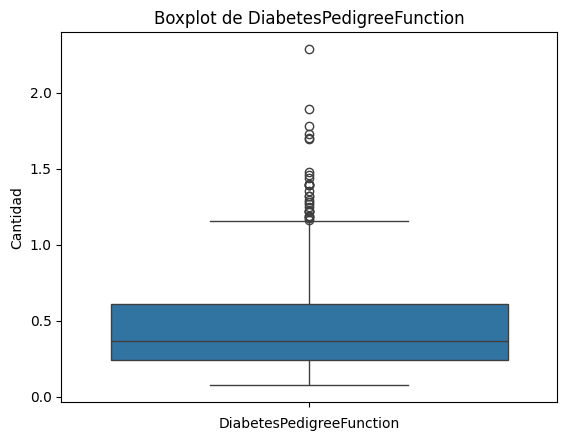

In [32]:
sns.boxplot(y ='DiabetesPedigreeFunction', data=df)
plt.title('Boxplot de DiabetesPedigreeFunction')
plt.xlabel('DiabetesPedigreeFunction')
plt.ylabel('Cantidad')

> **Observación**
> Como se pudo observar en la columna DiabetesPedigreeFunction, se cuenta con valores outliers que son mayores a 1.3 pero tratandose
> de una función utilizada en el campo de la investigación médica y la genética para evaluar el riesgo de desarrollar diabetes se aconseja dejar los outliers

3.2.9 Visualización de valores de la coulumna Age

Text(0, 0.5, 'Cantidad')

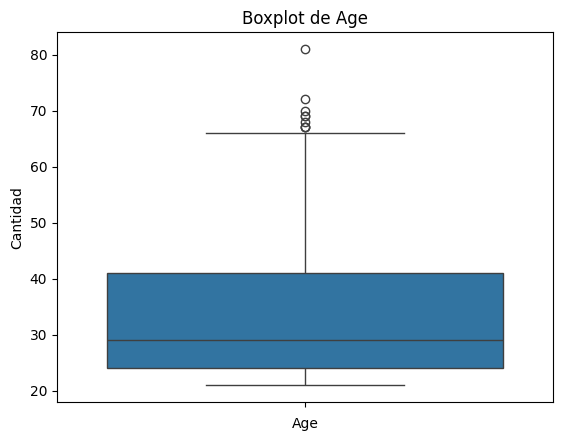

In [33]:
sns.boxplot(y ='Age', data=df)
plt.title('Boxplot de Age')
plt.xlabel('Age')
plt.ylabel('Cantidad')

> **Observación**
> Como se pudo observar en la columna Age, se cuenta con valores outliers que son mayores a 65

>**Sugerencia**
> Se sugiere que borrar los outliers de la edades mas alejadas en este caso la edad 81

In [34]:
df.loc[df['Age']==81]

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
459,9,134.0,74.0,33.0,60.0,25.9,0.46,81,0


**Borrando outliers de Age**

In [35]:
df = df.drop(index=[459])

Text(0, 0.5, 'Cantidad')

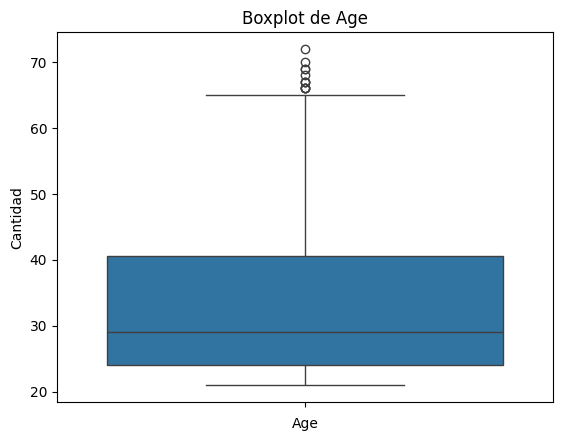

In [36]:
sns.boxplot(y ='Age', data=df)
plt.title('Boxplot de Age')
plt.xlabel('Age')
plt.ylabel('Cantidad')

<a id='sec_4'></a>
## 4. Análisis de los datos

En este caso debemos regresar al planteamiento inicial del problema y analizar nuestra data que hemos limpieado anteriormente.

Etapas de Análisis de los datos:

1. Vizualiar distribución de los datos(outliers)
2. Busqueda de correlación con nuestro valores objectivo(Outcome)

### 4.1. Vizualiar distribución de los datos(outliers)

<Axes: >

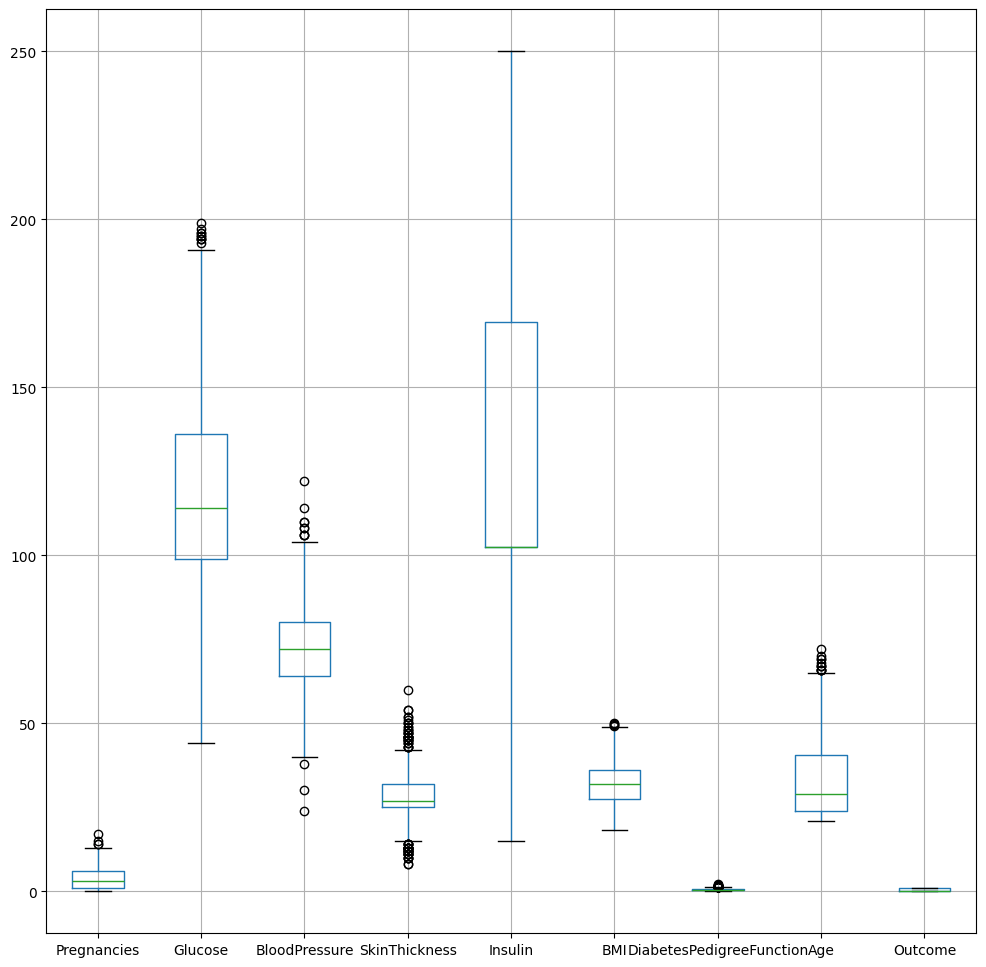

In [37]:
df.boxplot(figsize=(12, 12))

### 4.2. Busqueda de correlación con nuestro valores objectivo(Outcome)

<Axes: >

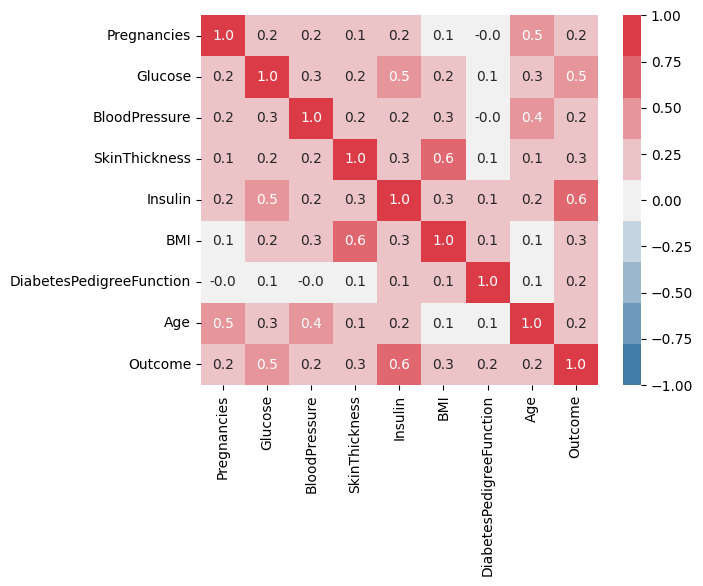

In [38]:
import seaborn as sns
sns.heatmap(df.corr(), cmap = sns.diverging_palette(240, 10, n=9), annot=True, fmt='.1f', vmin=-1, vmax=1
            )

<a id='sec_5'></a>
## 5. Preprocesamiento

En este caso debemos preprocesar nuestros datos para luego llevarlo a nuestro modelo.

Etapas de Análisis de los datos:

1. División de datos
2. Transformación de nuestros datos

### 5.1. División de datos

In [39]:
X = df.drop('Outcome', axis=1)
X.shape

(703, 8)

In [40]:
y = df['Outcome']

### 5.2. Transformación de nuestros datos

In [41]:
from sklearn.compose import make_column_selector
from sklearn.preprocessing import StandardScaler
from sklearn.compose import make_column_transformer
from sklearn.pipeline import make_pipeline

In [42]:
num_selector = make_column_selector(dtype_include='number')

In [43]:
# Standar scaler
standard_scaler = StandardScaler()

In [44]:
col_transformer = make_column_transformer((make_pipeline(standard_scaler), num_selector),
                        remainder = 'passthrough')

col_transformer

ColumnTransformer(remainder='passthrough',
                  transformers=[('pipeline',
                                 Pipeline(steps=[('standardscaler',
                                                  StandardScaler())]),
                                 <sklearn.compose._column_transformer.make_column_selector object at 0x0000024E781C7150>)])

In [45]:
col_transformer.fit(X)

ColumnTransformer(remainder='passthrough',
                  transformers=[('pipeline',
                                 Pipeline(steps=[('standardscaler',
                                                  StandardScaler())]),
                                 <sklearn.compose._column_transformer.make_column_selector object at 0x0000024E781C7150>)])

In [46]:
aux = col_transformer.transform(X)

In [47]:
aux=col_transformer.transform(X)
X_procesado=pd.DataFrame(aux,columns=col_transformer.get_feature_names_out())
X_procesado.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 703 entries, 0 to 702
Data columns (total 8 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   pipeline__Pregnancies               703 non-null    float64
 1   pipeline__Glucose                   703 non-null    float64
 2   pipeline__BloodPressure             703 non-null    float64
 3   pipeline__SkinThickness             703 non-null    float64
 4   pipeline__Insulin                   703 non-null    float64
 5   pipeline__BMI                       703 non-null    float64
 6   pipeline__DiabetesPedigreeFunction  703 non-null    float64
 7   pipeline__Age                       703 non-null    float64
dtypes: float64(8)
memory usage: 44.1 KB


<a id='sec_6'></a>
## 6. Predicción

En este caso debemos usar nuestros modelo de clasificación y evaluar nuestra predicción.

Etapas de Predicción:

1. Entrenamiento de nuestro modelo DecisionTreeClassifier
2. Evaluación de nuestra predicción DecisionTreeClassifier

### 6.1. Entrenamiento de nuestro modelo DecisionTreeClassifier

In [48]:
from sklearn.model_selection import train_test_split

# Partición 70% (train) y resto (40%)
X_train, X_test, y_train, y_test = train_test_split(
    X_procesado,y, test_size=0.3, random_state=123
)

In [49]:
X_train

,pipeline__Pregnancies,pipeline__Glucose,pipeline__BloodPressure,pipeline__SkinThickness,pipeline__Insulin,pipeline__BMI,pipeline__DiabetesPedigreeFunction,pipeline__Age
406,-1.145189,0.041436,0.138029,-1.305214,-1.313758,-0.228999,-0.561459,-0.618743
63,-0.848007,-0.819373,-0.531460,-1.915866,-1.867638,-1.928187,-0.403983,-0.705531
34,2.123821,0.661219,0.305401,-0.206041,-0.438628,0.191901,-0.127597,0.162340
33,0.043542,-0.543914,-1.033577,0.526741,1.544260,-1.242276,1.627138,-0.011234
626,-0.550824,0.351328,0.138029,-0.328171,1.832278,0.191901,0.421963,-0.705531
...,...,...,...,...,...,...,...,...
98,-0.550824,-1.163697,-0.615146,-0.206041,-0.438628,1.189589,1.511441,-0.531956
322,-0.848007,-0.991535,-0.866205,-2.037996,-1.756862,-0.743432,0.386611,-0.792318
382,-0.550824,-0.130726,-0.698833,-0.816692,-0.438628,-0.182232,-0.124383,-1.052679
365,1.529456,-1.611318,0.472773,-0.450301,-0.438628,-0.057521,-0.577528,0.422701


In [50]:
# Verificación
print('Tamaños: ')
print('\tDataset original: ', X.shape, y.shape)
print('\tEntrenamiento: ', X_train.shape, y_train.shape)
print('\tTest: ', X_test.shape, y_test.shape)

Tamaños: 
	Dataset original:  (703, 8) (703,)
	Entrenamiento:  (492, 8) (492,)
	Test:  (211, 8) (211,)


In [51]:
from sklearn.tree import DecisionTreeClassifier

In [52]:
# Define el clasificador
classifier = DecisionTreeClassifier(max_depth = 8,
                             random_state = 0)

# Entrena el modelo usando el conjunto de entrenamiento
classifier.fit(X_train, y_train)


DecisionTreeClassifier(max_depth=8, random_state=0)

In [53]:
classifier.score(X_train, y_train)

0.991869918699187

### 6.2. Evaluación de nuestra predicción DecisionTreeClassifier

In [54]:
y_pred = classifier.predict(X_test)

In [55]:
classifier.score(X_test, y_test)

0.8815165876777251

<a id='sec_7'></a>
## 7. Reporte final 

### 7.1. Reporte final

Basados en todo lo realizado anteriormente yo utilize DecisionTreeClassifier para predecir si una persona tiene diabetes o no por que es una mode de clasificación el cual 
se utiliza para poder hacer clasificación en este caso lo que queriamos es predecir si una persona tiene o no diabetes y considere a este mode el mejor
Sin embargo, es crucial tener en cuenta sus limitaciones, como el riesgo de sobreajuste y la necesidad de ajustar los hiperparámetros para obtener un rendimiento óptimo. Por otro lado
el resultado que se optuvo es de 0.88 el cual es una predicción buena ya que se hizo una previa limpieza de nuestra dataset y de la misma forma se realizo remplazar
valores 0 en algunas columnas por NAN el cual ayudo a no eliminar dichas filas.
Se conlcluye que nuestra predicción es muy buea e igual nuestro modelo DecisionTreeClassifier es la optima